In [1]:
import insightface
from insightface.app import FaceAnalysis
from swap_face import swap_n_show
import cv2
import matplotlib.pyplot as plt

/Users/rafael.fonseca/Library/Python/3.9/lib/python/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/rafael.fonseca/.insightface/models/buffalo_l/w600k_r50.onnx rec

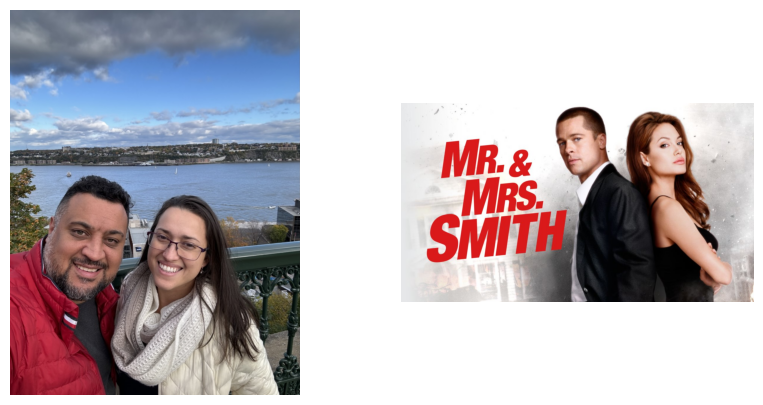

In [2]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))
swapper = insightface.model_zoo.get_model('model/inswapper_128.onnx', download=False, download_zip=False)

# read the 2 images
img1 = cv2.imread('img/rafa_gabi.jpeg')
img2 = cv2.imread('img/smith.jpg')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1[:, :, ::-1])
axs[0].axis('off')
axs[1].imshow(img2[:, :, ::-1])
axs[1].axis('off')
plt.show()

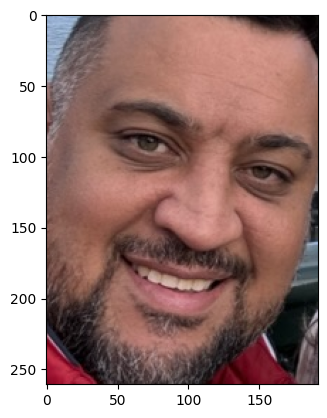

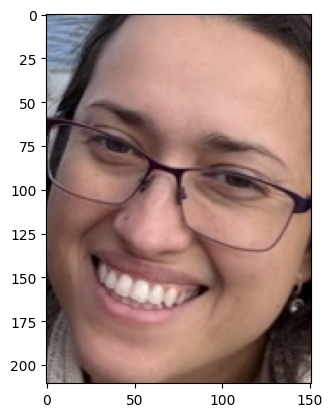

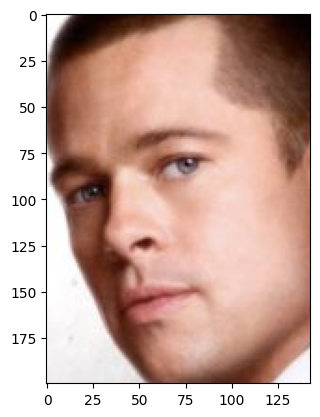

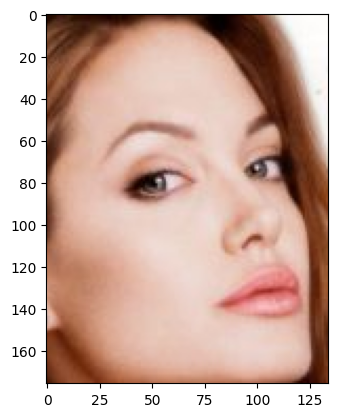

In [11]:
# Do the swap
rafa_face = app.get(img1)[1]
bbox = rafa_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img1[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

gabi_face = app.get(img1)[0]
bbox = gabi_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img1[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

brad_face = app.get(img2)[1]
bbox = brad_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img2[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

angelina_face = app.get(img2)[0]
bbox = angelina_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img2[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

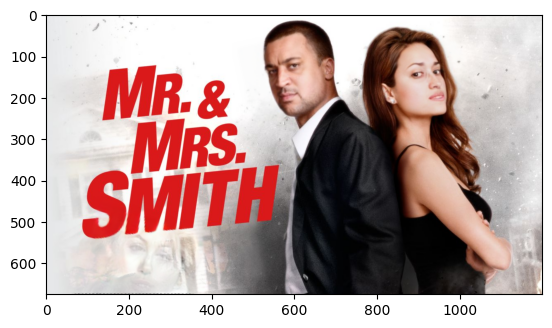

In [13]:
#img1 = img1.copy()
res = img2.copy()
res = swapper.get(res, brad_face, rafa_face, paste_back=True)
res = swapper.get(res, angelina_face, gabi_face, paste_back=True)
plt.imshow(res[:, :, ::-1])
plt.show()

/Users/rafael.fonseca/Library/Python/3.9/lib/python/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


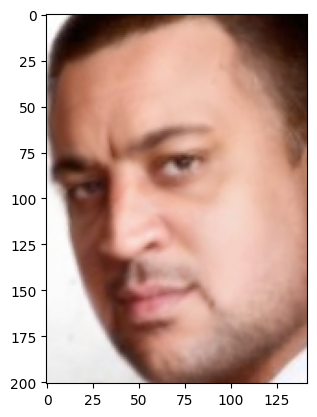

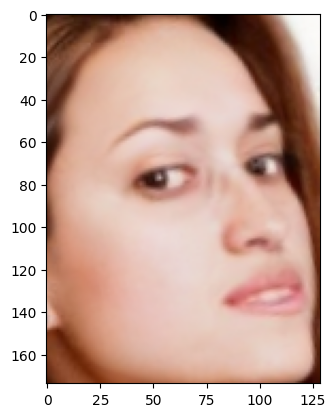

In [14]:
brad_face_final = app.get(res)[1]
bbox = brad_face_final['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(res[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

angelina_face_final = app.get(res)[0]
bbox = angelina_face_final['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(res[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()